In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df['median_income'].describe()

count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [4]:
df['income_cat'] = pd.cut(df['median_income'],
                            bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
                            labels=[1,2,3,4,5])

In [5]:
df['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
income_cat            0
dtype: int64

In [11]:
train_set = None
test_set = None

In [12]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.3, random_state=50)

In [13]:
for train_index,test_index in split.split(df,df['income_cat']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

C:\Users\ShubhamM3\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  
C:\Users\ShubhamM3\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
import matplotlib.pyplot as plt

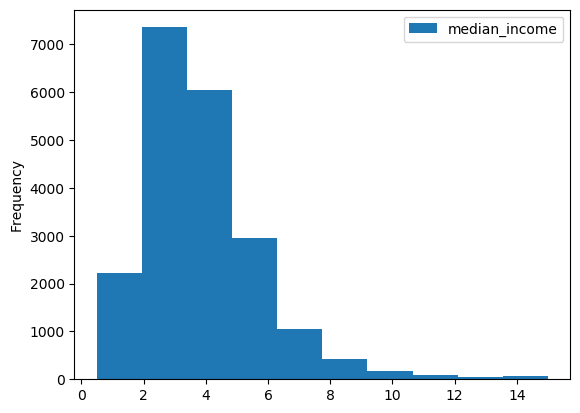

In [17]:
df[["median_income"]].plot(kind="hist")

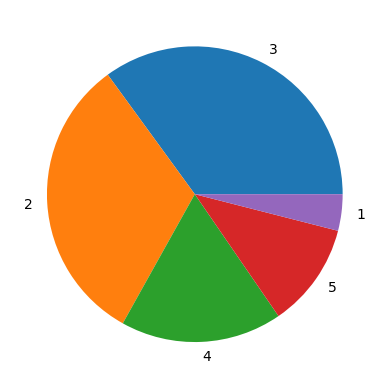

In [18]:
plt.pie(df.income_cat.value_counts(),labels=df.income_cat.value_counts().index)
plt.show()

In [19]:
df['income_cat'].value_counts()

3    7156
2    6515
4    3611
5    2337
1     814
Name: income_cat, dtype: int64

In [20]:
df['income_cat'].value_counts().index

CategoricalIndex([3, 2, 4, 5, 1], categories=[1, 2, 3, 4, 5], ordered=True, dtype='category')

In [21]:
train_set.shape

(14303, 11)

In [22]:
test_set.shape

(6130, 11)

In [23]:
df.shape

(20433, 11)

In [25]:
train_set = train_set.dropna()

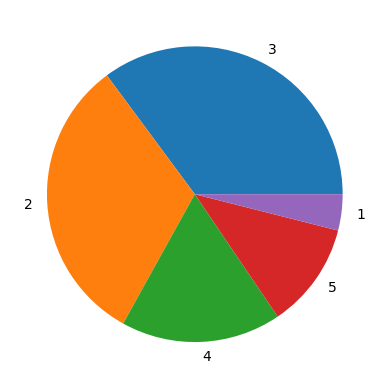

In [26]:
plt.pie(train_set.income_cat.value_counts(),labels=train_set.income_cat.value_counts().index)
plt.show()

In [27]:
test_set = test_set.dropna()

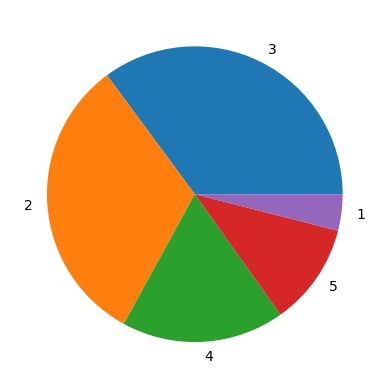

In [28]:
plt.pie(test_set.income_cat.value_counts(),labels=test_set.income_cat.value_counts().index)
plt.show()

In [29]:
test_set.shape

(6062, 11)

In [30]:
test_set = test_set.drop("income_cat",axis=1)
train_set = train_set.drop("income_cat",axis=1)

In [31]:
train_set.shape

(14166, 10)

In [32]:
test_set.to_csv("loan_test.csv",index = False)

In [33]:
train_set.to_csv("loan_train.csv",index = False)